# Relatório de Análises VII

## Identificando e Removendo Outliers

In [18]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(14,6))

In [19]:
dados = pd.read_csv('data/aluguel_residencial.csv', sep=';', encoding='utf-8-sig', decimal=',')

In [20]:
dados.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU,Valor m2,Tipo Agregado
0,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0,53.33,Apartamento
1,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,0.0,16.67,Apartamento
2,Apartamento,Cachambi,2,0,0,50,1300.0,301.0,17.0,26.00,Apartamento
3,Apartamento,Grajaú,2,1,0,70,1500.0,642.0,74.0,21.43,Apartamento
4,Apartamento,Lins de Vasconcelos,3,1,1,90,1500.0,455.0,14.0,16.67,Apartamento


In [21]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19831 entries, 0 to 19830
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Tipo           19831 non-null  object 
 1   Bairro         19831 non-null  object 
 2   Quartos        19831 non-null  int64  
 3   Vagas          19831 non-null  int64  
 4   Suites         19831 non-null  int64  
 5   Area           19831 non-null  int64  
 6   Valor          19831 non-null  float64
 7   Condominio     19831 non-null  float64
 8   IPTU           19831 non-null  float64
 9   Valor m2       19831 non-null  float64
 10  Tipo Agregado  19831 non-null  object 
dtypes: float64(4), int64(4), object(3)
memory usage: 1.7+ MB


<AxesSubplot:>

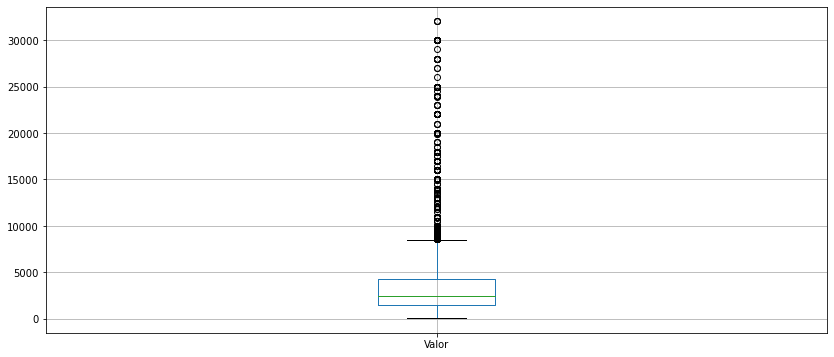

In [22]:
dados.boxplot(['Valor'])

<img src="data/box-plot.png" width=60%>

In [23]:
valor = dados['Valor']

In [24]:
Q1 = valor.quantile(.25)
Q3 = valor.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [25]:
selecao = (valor >= limite_inferior) & (valor <= limite_superior)
dados_new = dados[selecao]

<AxesSubplot:>

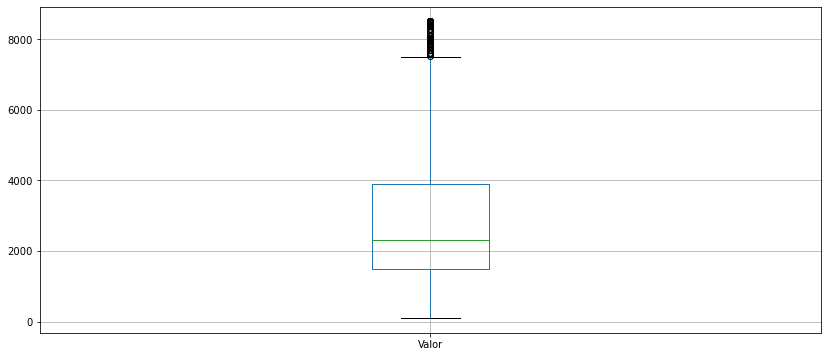

In [26]:
dados_new.boxplot(['Valor'])

array([[<AxesSubplot:title={'center':'Valor'}>]], dtype=object)

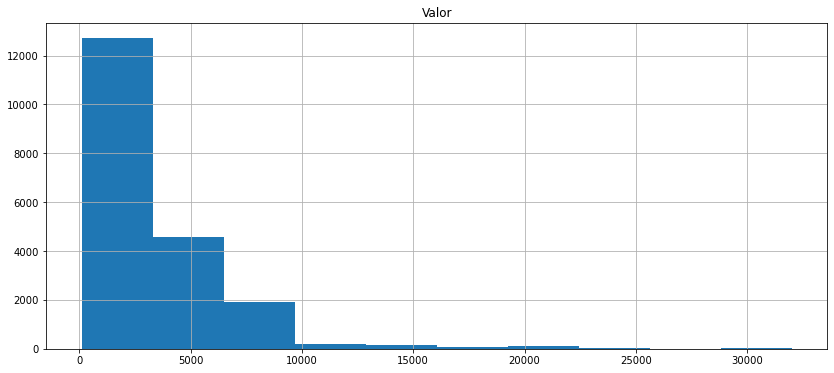

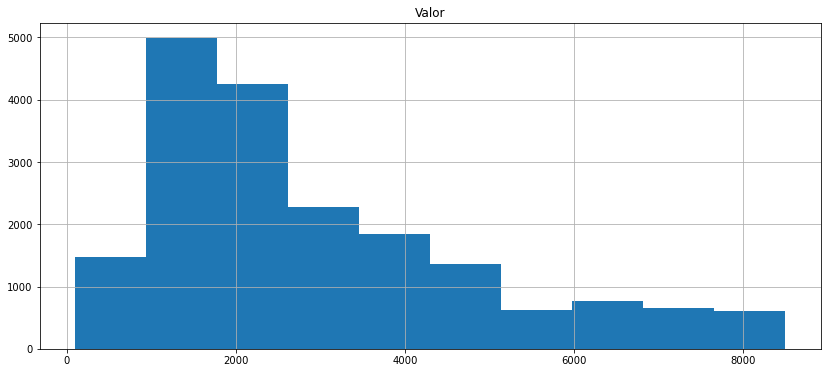

In [27]:
dados.hist(['Valor'])
dados_new.hist(['Valor'])

## Continuação

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

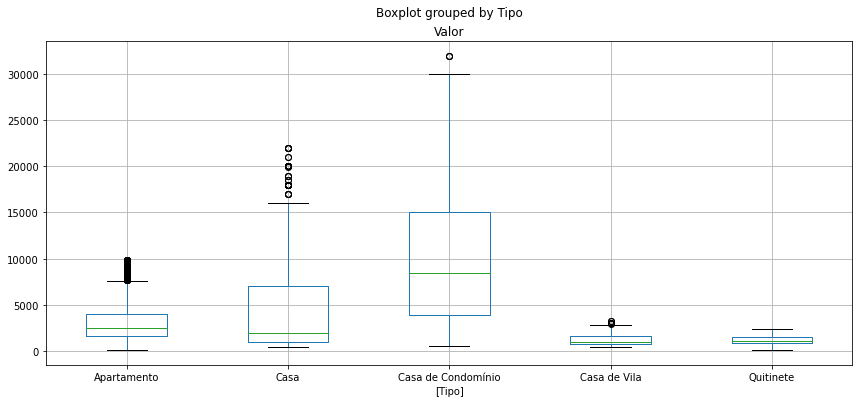

In [28]:
dados.boxplot(['Valor'], by=['Tipo'])

In [29]:
# Criando um grupo de Valor por Tipo
grupo_tipo = dados.groupby('Tipo')['Valor']
# grupo_tipo = dados.groupby('Tipo')[['Valor', 'Condominio']]

In [30]:
Q1 = grupo_tipo.quantile(.25)
Q3 = grupo_tipo.quantile(.75)
IIQ = Q3 - Q1
limite_inferior = Q1 - 1.5 * IIQ
limite_superior = Q3 + 1.5 * IIQ

In [31]:
Q1

Tipo
Apartamento           1600.0
Casa                  1000.0
Casa de Condomínio    3900.0
Casa de Vila           750.0
Quitinete              900.0
Name: Valor, dtype: float64

In [32]:
Q3

Tipo
Apartamento            4000.0
Casa                   7000.0
Casa de Condomínio    15000.0
Casa de Vila           1600.0
Quitinete              1500.0
Name: Valor, dtype: float64

In [33]:
IIQ

Tipo
Apartamento            2400.0
Casa                   6000.0
Casa de Condomínio    11100.0
Casa de Vila            850.0
Quitinete               600.0
Name: Valor, dtype: float64

In [34]:
limite_inferior

Tipo
Apartamento           -2000.0
Casa                  -8000.0
Casa de Condomínio   -12750.0
Casa de Vila           -525.0
Quitinete                 0.0
Name: Valor, dtype: float64

In [35]:
limite_superior

Tipo
Apartamento            7600.0
Casa                  16000.0
Casa de Condomínio    31650.0
Casa de Vila           2875.0
Quitinete              2400.0
Name: Valor, dtype: float64

In [36]:
dados_new = pd.DataFrame()
for tipo in grupo_tipo.groups.keys():
    eh_tipo = dados['Tipo'] == tipo
    eh_dentro_limite = (dados['Valor'] >= limite_inferior[tipo]) & (dados['Valor'] <= limite_superior[tipo])
    selecao = eh_tipo & eh_dentro_limite
    dados_selecao = dados[selecao]
    dados_new = pd.concat([dados_new, dados_selecao])

<AxesSubplot:title={'center':'Valor'}, xlabel='[Tipo]'>

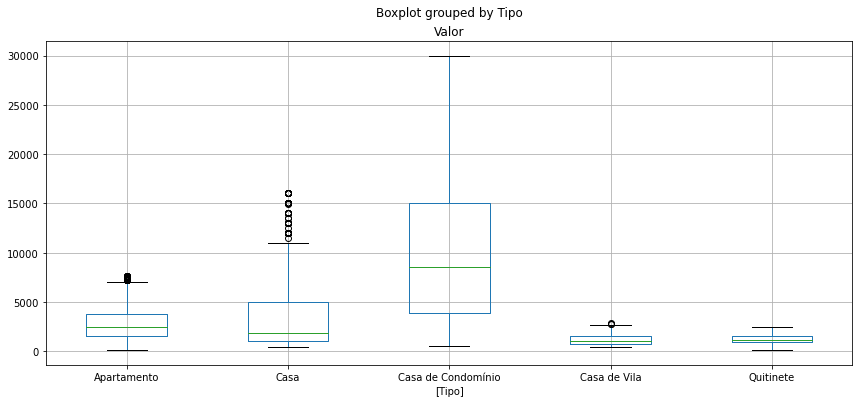

In [37]:
dados_new.boxplot(['Valor'], by=['Tipo'])

In [38]:
dados_new.to_csv('data/aluguel_residencial_sem_outliers.csv', sep=';', index=False, encoding='utf-8-sig', decimal=',')